In [1]:
import os
import sys

In [2]:
path_dir = (os.path.dirname(os.getcwd()))
sys.path.append(path_dir)
    
from homecredit.data import HomeCredit
from homecredit.preparation import Preparation
from homecredit.cleaner import Cleaning
from homecredit.exploration import Exploration
from homecredit.model import Modeling

from homecredit.encoder import Encoder

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import pickle

# HomeCredit()

In [4]:
data = HomeCredit().get_data()

In [5]:
data.keys()

dict_keys(['test', 'train'])

In [6]:
data['train'].shape

(307511, 122)

In [7]:
data_home = HomeCredit().get_data()['train']
data_home.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
data_home.shape

(307511, 122)

In [9]:
data_home['FLAG_OWN_CAR'].value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [10]:
max(data_home['OWN_CAR_AGE'])

nan

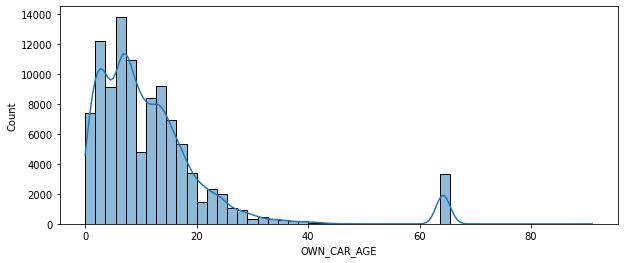

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 4))
sns.histplot(data_home['OWN_CAR_AGE'], kde=True, bins= 50);

In [12]:
data_home = data_home[data_home['CODE_GENDER'] != 'XNA'] # with gender = XNA
data_home = data_home[data_home['NAME_FAMILY_STATUS'] != 'Unknown'] # 'Unknown' status
# Remove entries with DAYS_EMPLOYED > 200_000
data_home = data_home[data_home['DAYS_EMPLOYED'] < 200_000]
data_home = data_home[data_home['AMT_ANNUITY'] < 150_000]
data_home = data_home[data_home['AMT_GOODS_PRICE'] < 2.5* 10**6]  

data_home['FLAG_OWN_CAR'].value_counts()

N    157417
Y     94337
Name: FLAG_OWN_CAR, dtype: int64

In [13]:
data_home = data_home[data_home['OWN_CAR_AGE'] < 80]
data_home['FLAG_OWN_CAR'].value_counts()

Y    94330
Name: FLAG_OWN_CAR, dtype: int64

# Preparation()

In [14]:
prep = Preparation() # data_set = 'train', cols = None
prep.data.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
mask = ['CODE_GENDER', 'FLAG_OWN_CAR', 'OCCUPATION_TYPE',  # categ
        'NAME_INCOME_TYPE', 'NAME_TYPE_SUITE', # categ 
       'EXT_SOURCE_3', 'DAYS_EMPLOYED', 'FLOORSMAX_AVG',  # num 
        'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', # num
        'TARGET' # target
       ]

prep = Preparation(cols = mask) #data_set='train'

print("shape : ", prep.data.shape)
prep.data.head(2)

shape :  (307511, 11)


,CODE_GENDER,FLAG_OWN_CAR,OCCUPATION_TYPE,NAME_INCOME_TYPE,NAME_TYPE_SUITE,EXT_SOURCE_3,DAYS_EMPLOYED,FLOORSMAX_AVG,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,TARGET
0,M,N,Laborers,Working,Unaccompanied,0.139376,-637,0.0833,-9461,2,1
1,F,N,Core staff,State servant,Family,NaN,-1188,0.2917,-16765,1,0


In [16]:
prep.get_catcols()

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'OCCUPATION_TYPE',
 'NAME_INCOME_TYPE',
 'NAME_TYPE_SUITE']

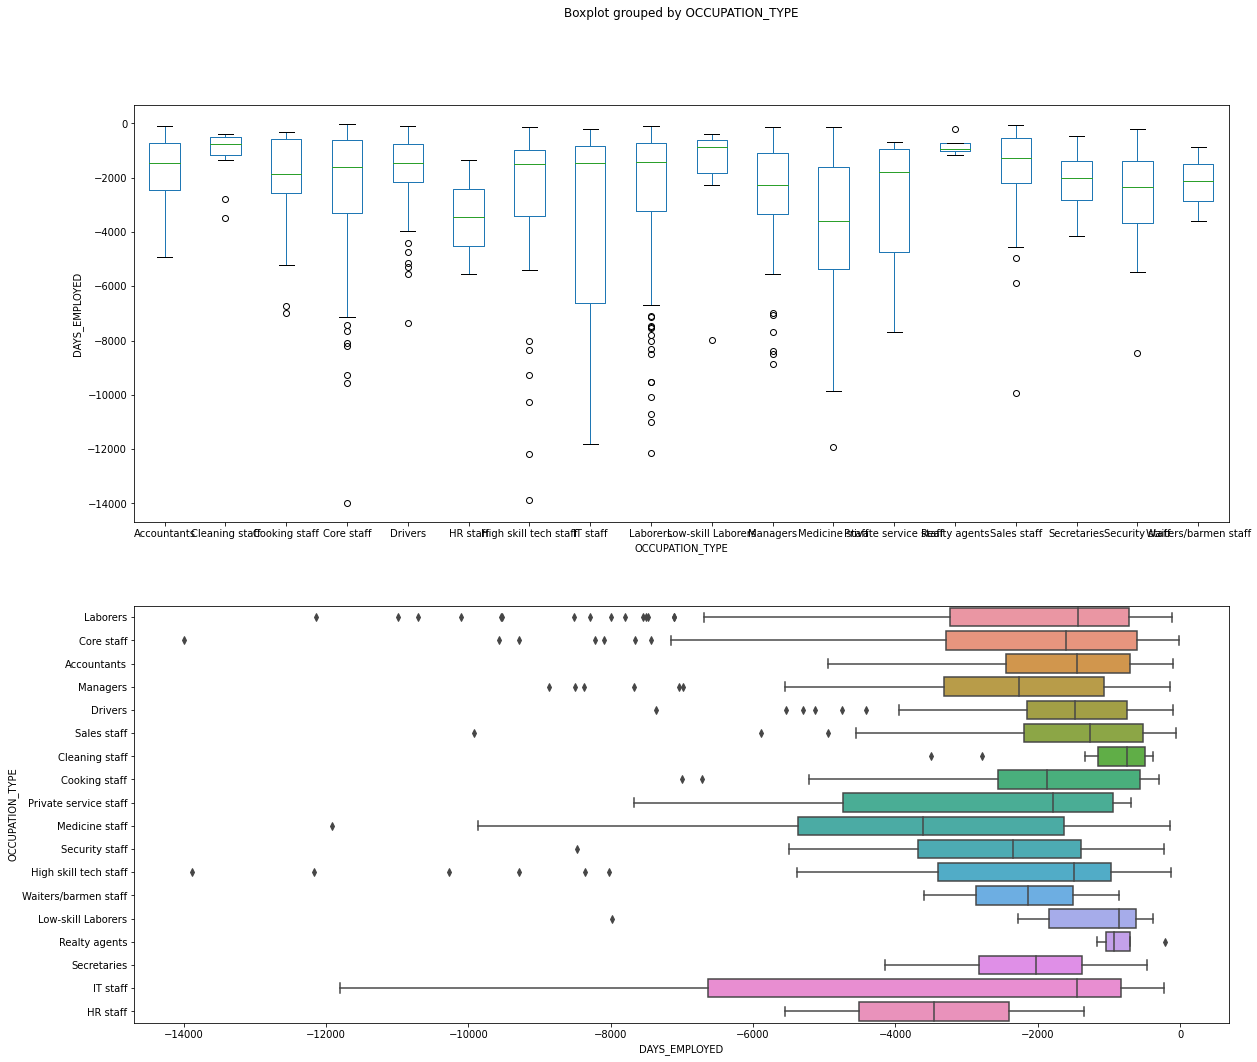

In [17]:
prep.plot_num_cat_cols(numcol= "DAYS_EMPLOYED", catcol="OCCUPATION_TYPE", plot_type=0)

/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 44.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 21.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 5.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 20.8% of the points cannot be placed; you may want to decrease the s

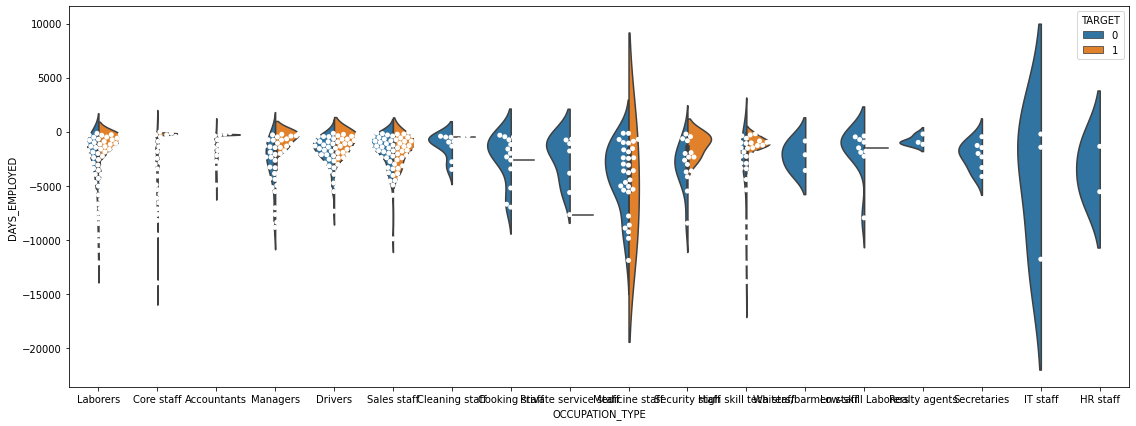

In [18]:
prep.plot_num_cat_cols(numcol= "DAYS_EMPLOYED", catcol="OCCUPATION_TYPE", hue="TARGET")

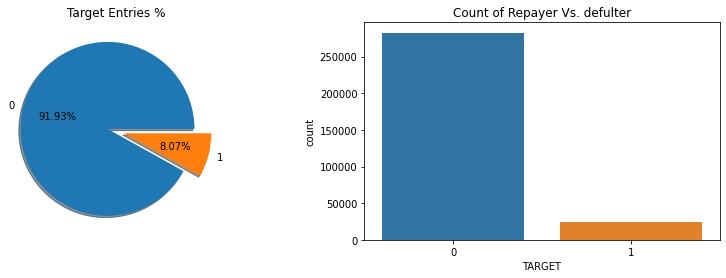

,TARGET
0,0.919271
1,0.080729


In [19]:
prep.targetVar()# targ= "TARGET", other_df=None

## when  data_set = 'test'

In [20]:
T = mask[:] #  [:] to keep the original list 'mask' unchanged
T.remove('TARGET')

In [21]:
prep = Preparation(data_set='test', cols = T)
prep.data.head(2)

,CODE_GENDER,FLAG_OWN_CAR,OCCUPATION_TYPE,NAME_INCOME_TYPE,NAME_TYPE_SUITE,EXT_SOURCE_3,DAYS_EMPLOYED,FLOORSMAX_AVG,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY
0,F,N,NaN,Working,Unaccompanied,0.159520,-2329,0.125,-19241,2
1,M,N,Low-skill Laborers,Working,Unaccompanied,0.432962,-4469,NaN,-18064,2


In [22]:
prep.data.shape

(48744, 10)

# Cleaning()

In [22]:
mask = ['CODE_GENDER', 'FLAG_OWN_CAR', 'OCCUPATION_TYPE',  # categ
        'NAME_INCOME_TYPE', 'NAME_TYPE_SUITE', # categ 
       'EXT_SOURCE_3', 'DAYS_EMPLOYED', 'FLOORSMAX_AVG',  # num 
        'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', # num
        'TARGET' # target
       ]

In [23]:
cl = Cleaning(cols = mask) # data_set = 'train', cols = None, newdf = None, targ= "TARGET"

In [29]:
cl.__dict__.keys()

dict_keys(['prep', 'cols', 'data_set', 'data', 'newdata'])

In [30]:
cl.data.shape, cl.newdata.shape  # data --> train, newdata --> test

((307511, 11), (48744, 10))

In [31]:
cl.data.head(2)# data --> train

,CODE_GENDER,FLAG_OWN_CAR,OCCUPATION_TYPE,NAME_INCOME_TYPE,NAME_TYPE_SUITE,EXT_SOURCE_3,DAYS_EMPLOYED,FLOORSMAX_AVG,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,TARGET
0,M,N,Laborers,Working,Unaccompanied,0.139376,-637,0.0833,-9461,2,1
1,F,N,Core staff,State servant,Family,NaN,-1188,0.2917,-16765,1,0


In [32]:
cl.newdata.head(2) #newdata --> test

,CODE_GENDER,FLAG_OWN_CAR,OCCUPATION_TYPE,NAME_INCOME_TYPE,NAME_TYPE_SUITE,EXT_SOURCE_3,DAYS_EMPLOYED,FLOORSMAX_AVG,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY
0,F,N,NaN,Working,Unaccompanied,0.159520,-2329,0.125,-19241,2
1,M,N,Low-skill Laborers,Working,Unaccompanied,0.432962,-4469,NaN,-18064,2


In [33]:
cl.get_count_missvalues() # data --> train

,0
FLOORSMAX_AVG,153020
OCCUPATION_TYPE,96391
EXT_SOURCE_3,60965
NAME_TYPE_SUITE,1292
CODE_GENDER,0
FLAG_OWN_CAR,0
NAME_INCOME_TYPE,0
DAYS_EMPLOYED,0
DAYS_BIRTH,0
REGION_RATING_CLIENT_W_CITY,0


In [37]:
#cl.data.shape : (307511, 11), # data --> train
# cl.newdata.shape  : (48744, 10) # newdata --> test

print("train : ", cl.remove_entries(set_df = 'train').shape)
print("test : ", cl.remove_entries(set_df = 'test').shape)

train :  (252133, 11)
test :  (39470, 10)


In [38]:
print("train : ", cl.remove_missvalues(set_df = 'train').shape)
print("test : ", cl.remove_missvalues(set_df = 'test').shape)

train :  (252133, 11)
test :  (39470, 10)


In [40]:
print("train : ", cl.data.isnull().sum().sum())
print("test : ", cl.newdata.isnull().sum().sum())

train :  311668
test :  48505


In [41]:
print("train : ", cl.remove_missvalues(set_df = 'train').isnull().sum().sum())
print("test : ", cl.remove_missvalues(set_df = 'test').isnull().sum().sum())

train :  0
test :  0


/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Number of missing values,Percent
FLOORSMAX_AVG,153020,49.76
OCCUPATION_TYPE,96391,31.35
EXT_SOURCE_3,60965,19.83
NAME_TYPE_SUITE,1292,0.42


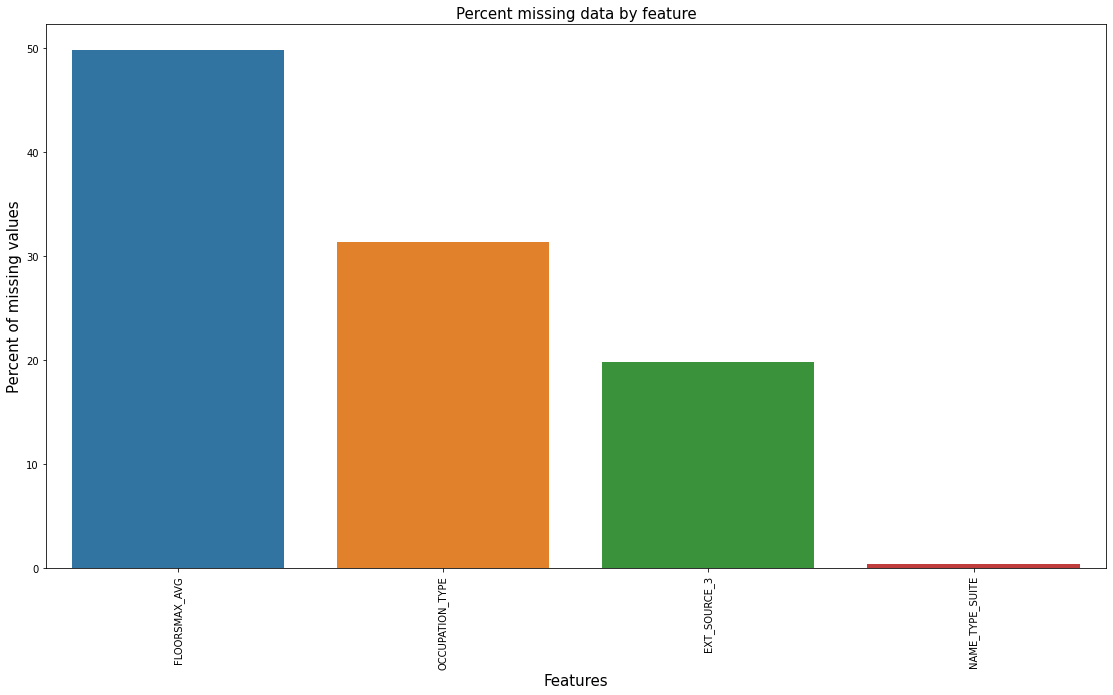

In [42]:
cl.plot_missvalues_table() # na_name=False: # data : train
                                            # if na_names: print the features list  

/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


['OCCUPATION_TYPE', 'NAME_TYPE_SUITE', 'EXT_SOURCE_3', 'FLOORSMAX_AVG']

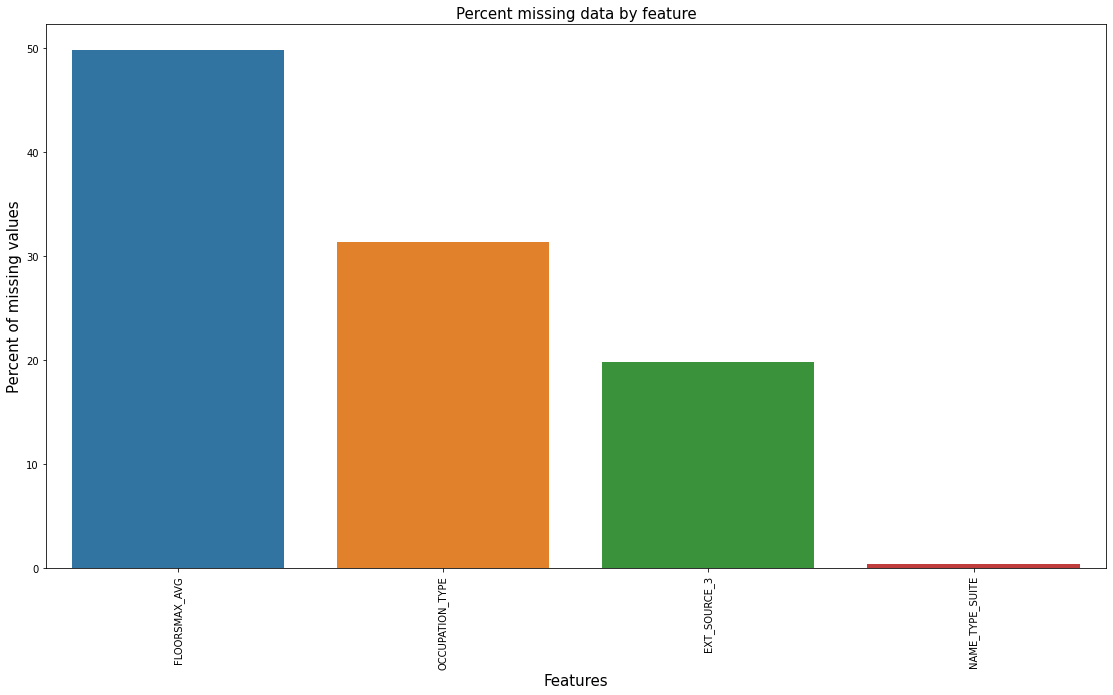

In [43]:
cl.plot_missvalues_table(na_name= True)

## Plots 'Repartition of a feature' : before cleaning

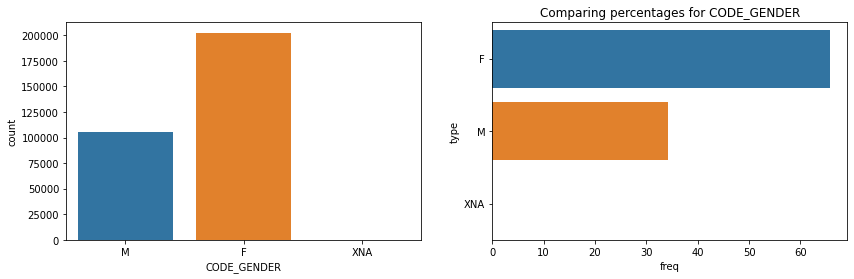

In [44]:
# without cleaning , here  : "CODE_GENDER"
cl.prep.plot_catcols_single(col = "CODE_GENDER")  # prep = Preparation(data_set, cols)

## Plots  'Repartition of a feature' : after cleaning

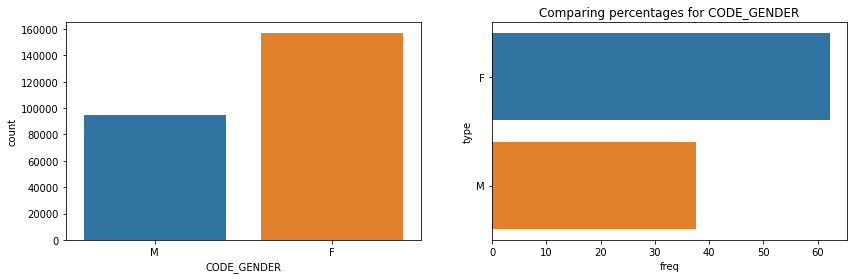

In [46]:
# with cleaning , here  : "CODE_GENDER"
cl.prep.data = cl.remove_missvalues(set_df = 'train')
cl.prep.plot_catcols_single(col = "CODE_GENDER")  # prep = Preparation(data_set, cols)

## Checking out the Cleaning() class when data_set = 'test'

In [4]:
mask = ['CODE_GENDER', 'FLAG_OWN_CAR', 'OCCUPATION_TYPE',  # categ
        'NAME_INCOME_TYPE', 'NAME_TYPE_SUITE', # categ 
       'EXT_SOURCE_3', 'DAYS_EMPLOYED', 'FLOORSMAX_AVG',  # num 
        'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', # num
        'TARGET' # target
       ]


T = mask[:] #  [:] to keep the original list 'mask' unchanged
T.remove('TARGET')

In [5]:
tt = Cleaning(data_set = 'test', cols= mask) # data_set = 'train', cols = None, newdf = None, targ= "TARGET"

Please, it is better to call Cleaning(), with data_set = 'train', that includes targetVar
Cleaning().newdata contains the data test after cleaning


In [6]:
tt.__dict__.keys()

dict_keys(['prep', 'cols', 'data_set', 'data', 'newdata'])

In [8]:
tt.prep.data_set, tt.data_set

('test', 'test')

In [9]:
tt.data.shape, tt.newdata.shape  # here, both correspond to test data

((48744, 10), (48744, 10))

/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Number of missing values,Percent
FLOORSMAX_AVG,23321,47.84
OCCUPATION_TYPE,15605,32.01
EXT_SOURCE_3,8668,17.78
NAME_TYPE_SUITE,911,1.87


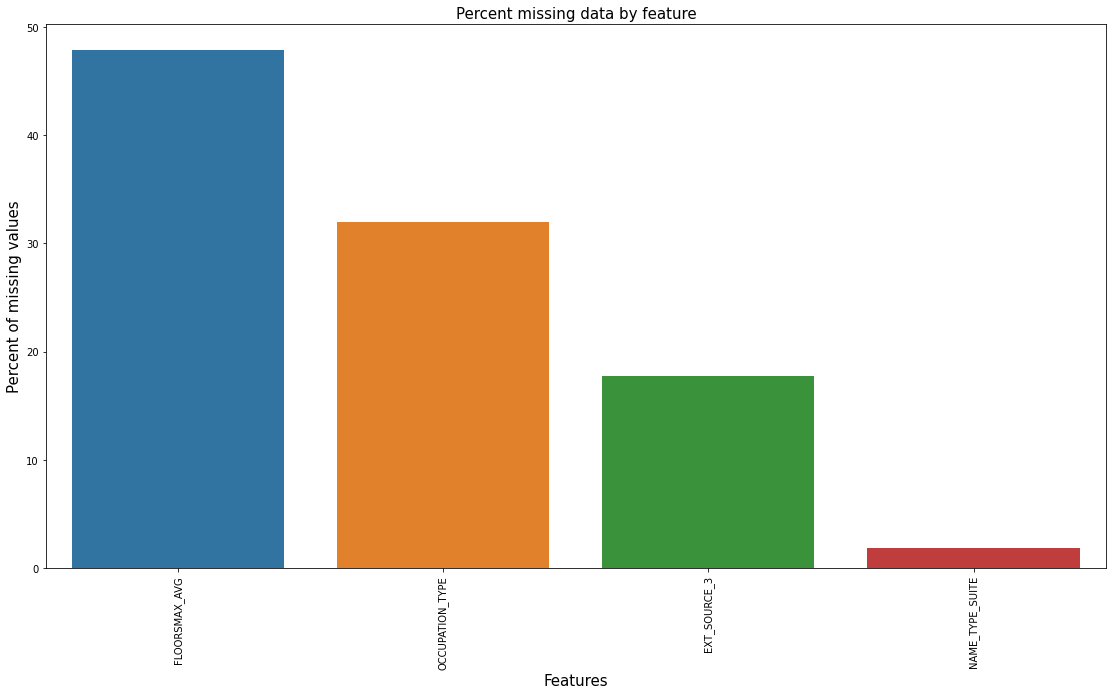

In [10]:
tt.plot_missvalues_table(), # if we want to explore missing values when data : test

In [11]:
# set_df = 'train' or 'test', both data (dataframes) are for data set
# Do not forget that here, tt = Cleaning(data_set = 'test', cols= mask)

print(" test : ", tt.remove_entries(set_df = 'train').shape) 
print("test : ", tt.remove_entries(set_df = 'test').shape)

train :  (39470, 10)
test :  (39470, 10)


In [12]:
# set_df = 'train' or 'test', both data (dataframes) are for data set
# Do not forget that here, tt = Cleaning(data_set = 'test', cols= mask)

print("test : ", tt.remove_missvalues(set_df = 'train').shape)
print("test : ", tt.remove_missvalues(set_df = 'test').shape)

test :  (39470, 10)
test :  (39470, 10)


In [13]:
# set_df = 'train' or 'test', both data (dataframes) are for data set
# Do not forget that here, tt = Cleaning(data_set = 'test', cols= mask)

print("test : ", tt.data.isnull().sum().sum())
print("test : ", tt.newdata.isnull().sum().sum())

test :  48505
test :  48505


In [14]:
# set_df = 'train' or 'test', both data (dataframes) are for data set
# Do not forget that here, tt = Cleaning(data_set = 'test', cols= mask)

print("test : ", tt.remove_missvalues(set_df = 'train').isnull().sum().sum())
print("test : ", tt.remove_missvalues(set_df = 'test').isnull().sum().sum())

test :  0
test :  0


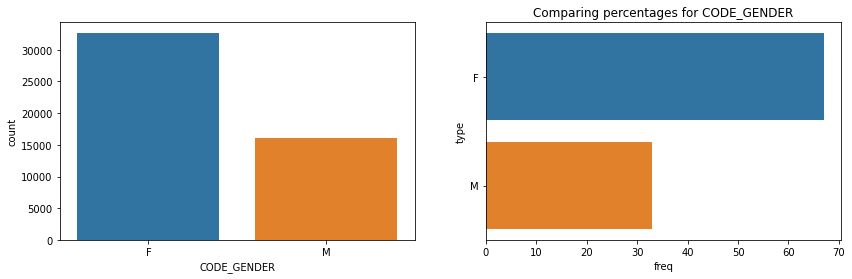

In [15]:
tt.prep.plot_catcols_single(col = "CODE_GENDER") # test data_set

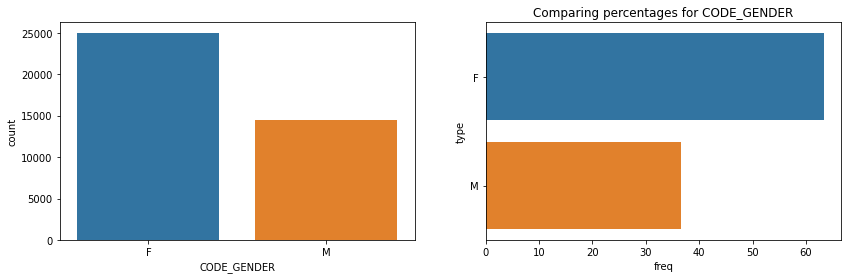

In [16]:
# with cleaning , here  : "CODE_GENDER"
tt.prep.data = tt.remove_missvalues(set_df = 'test')
tt.prep.plot_catcols_single(col = "CODE_GENDER") # test data_set

# Exploration()

In [4]:
mask = ['CODE_GENDER', 'FLAG_OWN_CAR', 'OCCUPATION_TYPE',  # categ
        'NAME_INCOME_TYPE', 'NAME_TYPE_SUITE', # categ 
       'EXT_SOURCE_3', 'DAYS_EMPLOYED', 'FLOORSMAX_AVG',  # num 
        'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', # num
        'TARGET' # target
       ]

In [5]:
ex = Exploration(cols=mask) # data_set = 'train', cols = None

In [6]:
ex.__dict__.keys()

#self.data = self.cl.remove_missvalues() 

dict_keys(['prep', 'cl', 'data', 'cols'])

In [7]:
print(ex.data.shape)
ex.data.head(2)

(252133, 11)


,CODE_GENDER,FLAG_OWN_CAR,OCCUPATION_TYPE,NAME_INCOME_TYPE,NAME_TYPE_SUITE,EXT_SOURCE_3,DAYS_EMPLOYED,FLOORSMAX_AVG,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,TARGET
0,M,N,Laborers,Working,Unaccompanied,0.139376,-637,0.0833,-9461,2,1
1,F,N,Core staff,State servant,Family,0.500345,-1188,0.2917,-16765,1,0


In [8]:
ex.data.isnull().sum().sum()

0

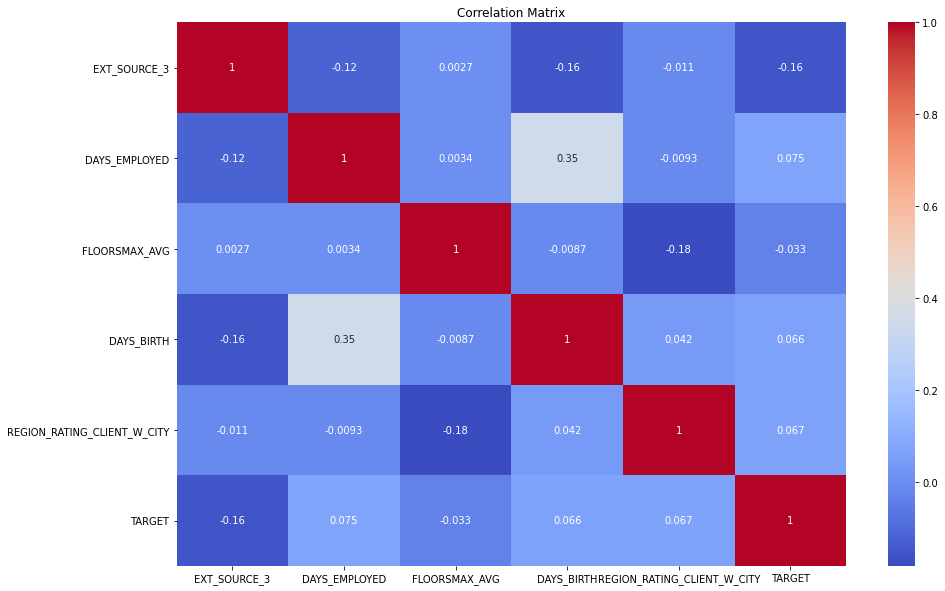

In [9]:
ex.plot_correlation(cbar =True)

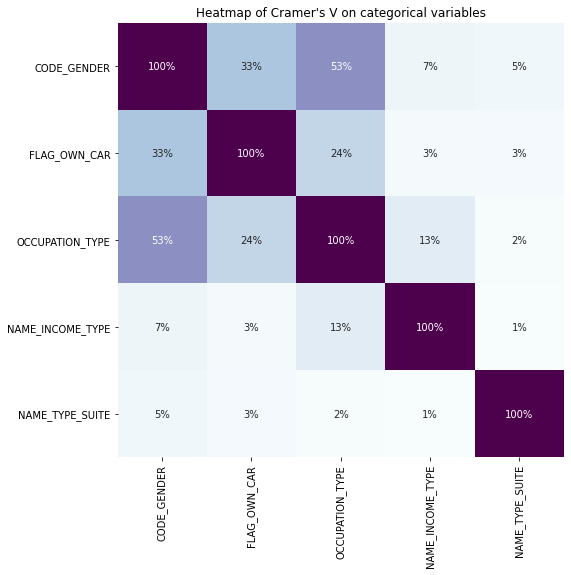

In [10]:
ex.plot_heatmapCramerV()

In [18]:
ex.prep.data_set, ex.cl.prep.data_set, len(ex.cl.cols), ex.cl.data.shape

('train', 'train', 11, (307511, 11))

In [19]:
ex.cl.data = ex.data
ex.cl.data.shape

(252133, 11)

In [20]:
# with cleaning
ex.cl.get_count_missvalues()

,0
CODE_GENDER,0
FLAG_OWN_CAR,0
OCCUPATION_TYPE,0
NAME_INCOME_TYPE,0
NAME_TYPE_SUITE,0
EXT_SOURCE_3,0
DAYS_EMPLOYED,0
FLOORSMAX_AVG,0
DAYS_BIRTH,0
REGION_RATING_CLIENT_W_CITY,0


## Checking out the Exploration() class when data_set = 'test'

*if we want to make an exploration analysis on another data*
- Here , for example : application_test.csv since it is the only other data existing in this directory

In [6]:
EX = Exploration(data_set='test', cols=mask)
EX.cl.prep.data_set #= 'test'

Please, it is better to call Cleaning(), with data_set = 'train', that includes targetVar
Cleaning().newdata contains the data test after cleaning


'test'

In [7]:
EX.prep.data_set# = 'test'

'test'

In [8]:
EX.cl.get_count_missvalues()

,0
FLOORSMAX_AVG,23321
OCCUPATION_TYPE,15605
EXT_SOURCE_3,8668
NAME_TYPE_SUITE,911
CODE_GENDER,0
FLAG_OWN_CAR,0
NAME_INCOME_TYPE,0
DAYS_EMPLOYED,0
DAYS_BIRTH,0
REGION_RATING_CLIENT_W_CITY,0


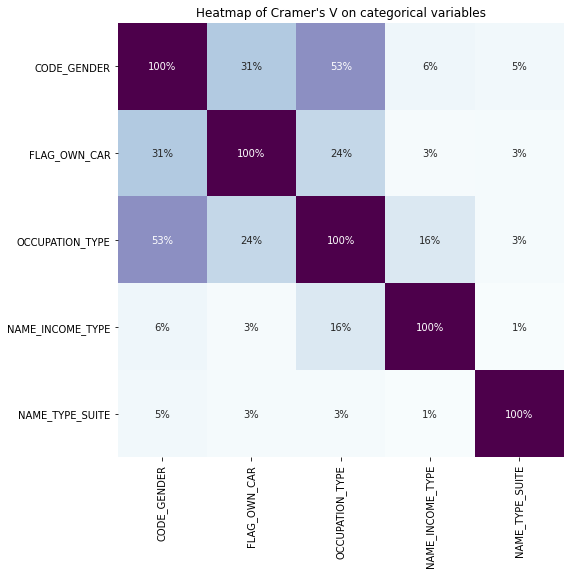

In [9]:
EX.plot_heatmapCramerV()

# Encoder()

In [10]:
mask = ['CODE_GENDER', 'FLAG_OWN_CAR', 'OCCUPATION_TYPE',  # categ
        'NAME_INCOME_TYPE', 'NAME_TYPE_SUITE', # categ 
       'EXT_SOURCE_3', 'DAYS_EMPLOYED', 'FLOORSMAX_AVG',  # num 
        'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', # num
        'TARGET' # target
       ]

In [11]:
en = Encoder(cols=mask) # data_set = 'train', cols = None, newdf = None, targ= "TARGET"

In [12]:
en.__dict__.keys()

dict_keys(['prep', 'cl', 'data', 'tt', 'new_data'])

In [13]:
en.data.head(2)

,CODE_GENDER,FLAG_OWN_CAR,OCCUPATION_TYPE,NAME_INCOME_TYPE,NAME_TYPE_SUITE,EXT_SOURCE_3,DAYS_EMPLOYED,FLOORSMAX_AVG,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,TARGET
0,M,N,Laborers,Working,Unaccompanied,0.139376,-637,0.0833,-9461,2,1
1,F,N,Core staff,State servant,Family,0.500345,-1188,0.2917,-16765,1,0


In [14]:
en.new_data.head(2)

,CODE_GENDER,FLAG_OWN_CAR,OCCUPATION_TYPE,NAME_INCOME_TYPE,NAME_TYPE_SUITE,EXT_SOURCE_3,DAYS_EMPLOYED,FLOORSMAX_AVG,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY
0,F,N,,Working,Unaccompanied,0.159520,-2329,0.125000,-19241,2
1,M,N,Low-skill Laborers,Working,Unaccompanied,0.432962,-4469,0.234704,-18064,2


In [16]:
en.data.shape, en.new_data.shape  # data --> train, new_data --> test

((252133, 11), (39470, 10))

In [17]:
encoded_df = en.execute() # data_topredict=False ---> encoding 'train' data
encoded_df.head(2)

,EXT_SOURCE_3,DAYS_EMPLOYED,FLOORSMAX_AVG,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,TARGET,F,M,N,Y,...,State servant,Student,Working,Children,Family,Group of people,Other_A,Other_B,"Spouse, partner",Unaccompanied
0,0.139376,-637,0.0833,-9461,2,1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0.500345,-1188,0.2917,-16765,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,0


In [18]:
(encoded_df_train, encoded_df_pred) = en.execute(data_topredict=True) # here, we get encoded data for 
                                                            #train & test sets ---> data_topredict:True
encoded_df_train.head(2)

,EXT_SOURCE_3,DAYS_EMPLOYED,FLOORSMAX_AVG,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,TARGET,F,M,N,Y,...,State servant,Student,Working,Children,Family,Group of people,Other_A,Other_B,"Spouse, partner",Unaccompanied
0,0.139376,-637,0.0833,-9461,2,1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0.500345,-1188,0.2917,-16765,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,0


In [19]:
encoded_df_pred.head(2)

,EXT_SOURCE_3,DAYS_EMPLOYED,FLOORSMAX_AVG,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,F,M,N,Y,Accountants,...,State servant,Student,Working,Children,Family,Group of people,Other_A,Other_B,"Spouse, partner",Unaccompanied
0,0.159520,-2329,0.125000,-19241,2,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0.432962,-4469,0.234704,-18064,2,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
